# <b><u>Simple Linear Regression</u></b>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
## Reading the dataset

df = pd.read_csv('height-weight (1).csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

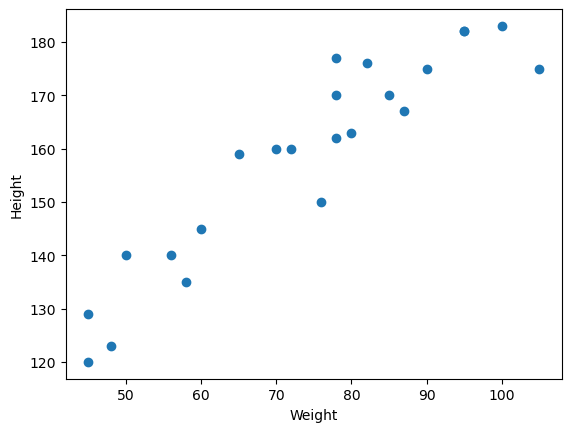

In [49]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [50]:
## divide our dataset into independent and dependent feature 
X= df[['Weight']]                     # -> independent features
Y = df['Height']                     # -> dependent features

In [51]:
## Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [52]:
X.shape

(23, 1)

In [53]:
X_train.shape

(18, 1)

In [54]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

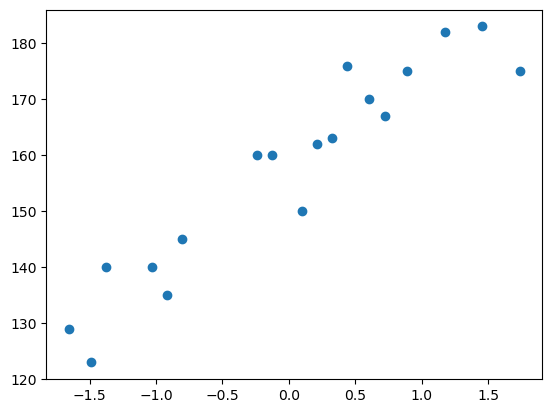

In [56]:
plt.scatter(X_train, Y_train)

In [57]:
## Train the Model

from sklearn.linear_model import LinearRegression

In [58]:
regressor = LinearRegression()

regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
print("Slope or co - efficient of Weight is :",regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope or co - efficient of Weight is : [17.03440872]
Intercept: 157.5


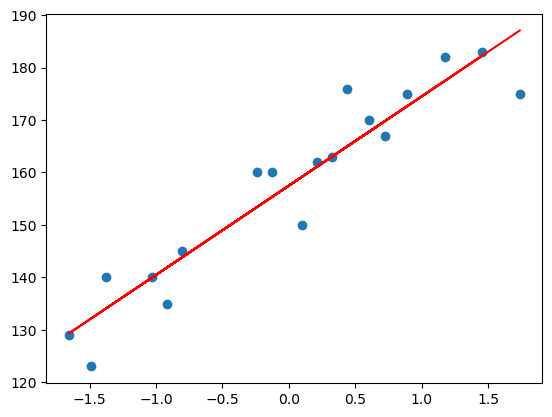

In [60]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of train data
1. predicted height output = intercept + coeff_(Weights)
2. y_pred_train = 156 + 17.03(X_train)

### Prediction of test data
1. predicted heights poutput = intercept + coeff_(weights)
2. y_pred_test = 156 + 17.03(X_test)

In [61]:
y_pred_test = regressor.predict(X_test)

In [62]:
y_pred_test, Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

## Performance Metrics 

 MSE, MAE, RMSE
 R square and Adjusted R square

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
mse = mean_squared_error(Y_test,y_pred_test)
mae = mean_absolute_error(Y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square

Formula

**R^2 = 1- SSR/SST**

R^2 = co efficient of determination<br>
SSR = sum of squares of residuals<br>
SST = total sum of square

In [65]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, y_pred_test)

In [66]:
score

0.776986986042344

### Adjusted R Square

**Ajusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where:
R2 : The R2 of the model<br>
n : The number of Observation<br>
k : The number of predictor variables

In [68]:
## Ajusted R square value
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [69]:
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\sanat\anaconda3\envs\sanath\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [73]:
print("the Height Prediction for 80 Kgs is ",regressor.predict([scaled_weight[0]]))

the Height Prediction for 80 Kgs is  [163.01076266]


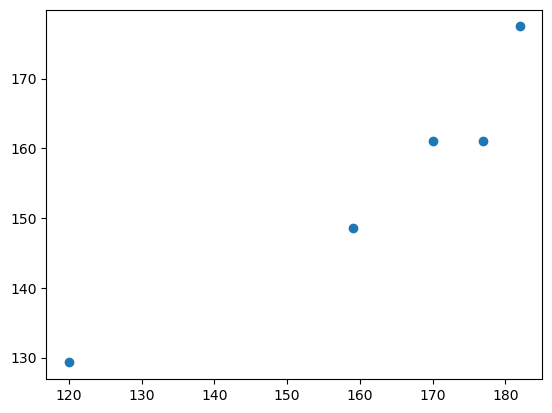

In [74]:
## Assumptions

## Plot a scatter plot for predictiom

plt.scatter(Y_test, y_pred_test)

In [75]:
## Residuals

residuals = Y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\sanat\AppData\Local\Temp\ipykernel_18108\2495506836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde='True')


<Axes: xlabel='Height', ylabel='Density'>

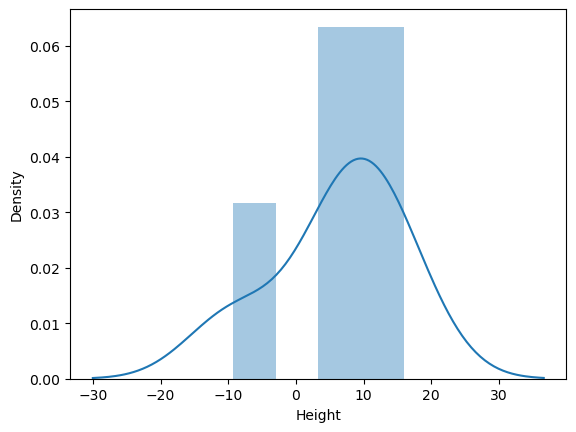

In [76]:
# plot this residuals

import seaborn as sns
sns.distplot(residuals,kde='True')

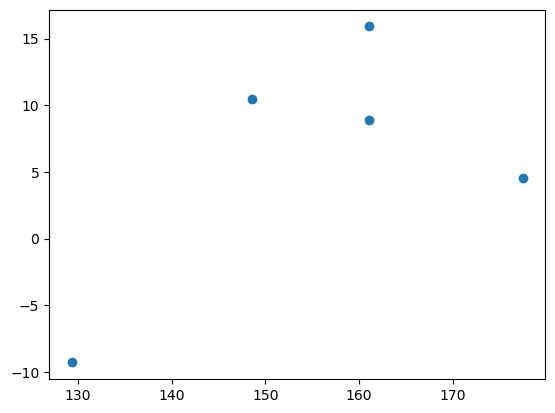

In [77]:
## Scatter plot with respect to prediction and residuals
# Uniform distribution

plt.scatter(y_pred_test, residuals)